# Cell Type Representations
This notebook contains code for extracting generaizable features of a particular cell_type in an attempt to incorporate biological information. One part consists of conducting PCA on sc-ATAC data for perturbation analysis.

## PCA on sc-ATAC Data
We conduct PCA/Randomized PCA/Truncated SVD on sc-ATAC data to embed cell types based on chromatin accessibility.

In [2]:
import pandas as pd
import numpy as np
import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [114]:
# Read the data
multiome_train = pd.read_parquet('data/multiome_train.parquet')
multiome_obs_meta = pd.read_csv('data/multiome_obs_meta.csv')
multiome_var_meta = pd.read_csv('data/multiome_var_meta.csv')

In [3]:
multiome_train.head()

,obs_id,location,count,normalized_count
0,000225c1151ab841,AAMP,1,6.320659
1,000225c1151ab841,AASS,1,6.320659
2,000225c1151ab841,ABCC11,1,6.320659
3,000225c1151ab841,ABCC2,1,6.320659
4,000225c1151ab841,ABR,1,6.320659


In [7]:
multiome_var_meta.head()

,location,gene_id,feature_type,genome,interval
0,A1BG,ENSG00000121410,Gene Expression,GRCh38,chr19:58353491-58353492
1,A1BG-AS1,ENSG00000268895,Gene Expression,GRCh38,chr19:58347750-58351970
2,A2M,ENSG00000175899,Gene Expression,GRCh38,chr12:9116156-9116157
3,A2M-AS1,ENSG00000245105,Gene Expression,GRCh38,chr12:9065162-9065177
4,A2ML1,ENSG00000166535,Gene Expression,GRCh38,chr12:8822620-8845004


In [8]:
multiome_var_meta['feature_type'].value_counts()

feature_type
Peaks              135418
Gene Expression     22787
Name: count, dtype: int64

In [21]:
multiome_var_meta[multiome_var_meta['feature_type'] == 'Peaks'].head()

,location,gene_id,feature_type,genome,interval
10677,GL000194.1:100992-101876,GL000194.1:100992-101876,Peaks,GRCh38,GL000194.1:100992-101876
10678,GL000194.1:104344-105163,GL000194.1:104344-105163,Peaks,GRCh38,GL000194.1:104344-105163
10679,GL000194.1:110741-111545,GL000194.1:110741-111545,Peaks,GRCh38,GL000194.1:110741-111545
10680,GL000194.1:114513-115368,GL000194.1:114513-115368,Peaks,GRCh38,GL000194.1:114513-115368
10681,GL000194.1:27939-28826,GL000194.1:27939-28826,Peaks,GRCh38,GL000194.1:27939-28826


In [5]:
multiome_obs_meta.head()

,obs_id,cell_type,donor_id
0,000225c1151ab841,B cells,donor_0
1,0003c40a54367871,T cells CD4+,donor_2
2,0004bf574b822c3c,T cells CD4+,donor_2
3,000d59b5478f28e2,B cells,donor_0
4,0011b7473923d7b5,NK cells,donor_2


In [20]:
len(multiome_var_meta)

158205

In [116]:
# Filter the var_meta to get only ATAC-seq locations (Peaks)
atac_var_meta = multiome_var_meta[multiome_var_meta['feature_type'] == 'Peaks']

# Use these ATAC locations to filter the train data
atac_data = multiome_train[multiome_train['location'].isin(atac_var_meta['location'])]

In [117]:
atac_data.head()

,obs_id,location,count,normalized_count
1076,000225c1151ab841,chr10:100346599-100347467,2,2.664076
1077,000225c1151ab841,chr10:101214564-101215355,2,4.966185
1078,000225c1151ab841,chr10:101353529-101354425,4,1.627825
1079,000225c1151ab841,chr10:101830364-101831303,2,1.333610
1080,000225c1151ab841,chr10:102064862-102065750,2,1.588739


In [118]:
atac_var_meta.head()

,location,gene_id,feature_type,genome,interval
10677,GL000194.1:100992-101876,GL000194.1:100992-101876,Peaks,GRCh38,GL000194.1:100992-101876
10678,GL000194.1:104344-105163,GL000194.1:104344-105163,Peaks,GRCh38,GL000194.1:104344-105163
10679,GL000194.1:110741-111545,GL000194.1:110741-111545,Peaks,GRCh38,GL000194.1:110741-111545
10680,GL000194.1:114513-115368,GL000194.1:114513-115368,Peaks,GRCh38,GL000194.1:114513-115368
10681,GL000194.1:27939-28826,GL000194.1:27939-28826,Peaks,GRCh38,GL000194.1:27939-28826


In [25]:
# Pivot the data
atac_data_pivot = atac_data.pivot(index='obs_id', columns='location', values='normalized_count').fillna(0)

/tmp/ipykernel_2164/3701992948.py:2: PerformanceWarning: The following operation may generate 3460065318 cells in the resulting pandas object.
  atac_data_pivot = atac_data.pivot(index='obs_id', columns='location', values='normalized_count').fillna(0)


In [27]:
import os

if not os.path.exists("data/adata_data_pivot.pkl"):
    pickle.dump(open("data/adata_data_pivot.pkl", "wb+"), atac_data_pivot)

In [3]:
atac_data_pivot = pickle.load(open("data/adata_data_pivot.pkl", "rb"))

In [108]:
atac_data_pivot

location,GL000194.1:100992-101876,GL000194.1:104344-105163,GL000194.1:110741-111545,GL000194.1:114513-115368,GL000194.1:27939-28826,GL000194.1:55749-56580,GL000194.1:58219-58991,GL000194.1:59583-60481,GL000194.1:67194-67888,GL000194.1:69334-70130,...,chrY:7714244-7715127,chrY:7722309-7723213,chrY:7723979-7724872,chrY:7729946-7730737,chrY:7731829-7732671,chrY:7765105-7765991,chrY:7814158-7815060,chrY:7818681-7819599,chrY:8535565-8536421,chrY:8537529-8538370
obs_id,,,,,,,,,,,,,,,,,,,,,
000225c1151ab841,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003c40a54367871,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bf574b822c3c,0.0,0.0,0.0,0.0,1.920409,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000d59b5478f28e2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0011b7473923d7b5,0.0,0.0,0.0,0.0,0.851651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2ca1f64c10339,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff87e64f509b570,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9778b31bc2539,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.192939,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
multiome_obs_meta = pd.read_csv('data/multiome_obs_meta.csv')

In [5]:
# Join with cell type information
atac_data_with_cell_type = atac_data_pivot.join(multiome_obs_meta.set_index('obs_id')['cell_type'])

In [6]:
atac_data_with_cell_type

,GL000194.1:100992-101876,GL000194.1:104344-105163,GL000194.1:110741-111545,GL000194.1:114513-115368,GL000194.1:27939-28826,GL000194.1:55749-56580,GL000194.1:58219-58991,GL000194.1:59583-60481,GL000194.1:67194-67888,GL000194.1:69334-70130,...,chrY:7722309-7723213,chrY:7723979-7724872,chrY:7729946-7730737,chrY:7731829-7732671,chrY:7765105-7765991,chrY:7814158-7815060,chrY:7818681-7819599,chrY:8535565-8536421,chrY:8537529-8538370,cell_type
obs_id,,,,,,,,,,,,,,,,,,,,,
000225c1151ab841,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B cells
0003c40a54367871,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T cells CD4+
0004bf574b822c3c,0.0,0.0,0.0,0.0,1.920409,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T cells CD4+
000d59b5478f28e2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B cells
0011b7473923d7b5,0.0,0.0,0.0,0.0,0.851651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NK cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2ca1f64c10339,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T cells CD4+
fff87e64f509b570,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T cells CD4+
fff9778b31bc2539,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,4.192939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Myeloid cells


In [48]:
# Count all nonzero values in atac_data
(atac_data_with_cell_type.iloc[:, :-1] > 0).sum().sum()

173485202

In [9]:
# Separate ATAC-seq data and cell type information
atac_data = atac_data_with_cell_type.drop('cell_type', axis=1)
cell_types = atac_data_with_cell_type['cell_type']

In [8]:
atac_data

,GL000194.1:100992-101876,GL000194.1:104344-105163,GL000194.1:110741-111545,GL000194.1:114513-115368,GL000194.1:27939-28826,GL000194.1:55749-56580,GL000194.1:58219-58991,GL000194.1:59583-60481,GL000194.1:67194-67888,GL000194.1:69334-70130,...,chrY:7714244-7715127,chrY:7722309-7723213,chrY:7723979-7724872,chrY:7729946-7730737,chrY:7731829-7732671,chrY:7765105-7765991,chrY:7814158-7815060,chrY:7818681-7819599,chrY:8535565-8536421,chrY:8537529-8538370
obs_id,,,,,,,,,,,,,,,,,,,,,
000225c1151ab841,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003c40a54367871,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bf574b822c3c,0.0,0.0,0.0,0.0,1.920409,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000d59b5478f28e2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0011b7473923d7b5,0.0,0.0,0.0,0.0,0.851651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2ca1f64c10339,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff87e64f509b570,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9778b31bc2539,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.192939,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD

import numpy as np

def pca_analysis(_atac_data, _cell_types, n_components=10, randomized=False, scale=False):
    # Standardize the ATAC-seq data
    if scale:
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(_atac_data)  
    else:
        scaled_data = _atac_data

    # Perform PCA
    if randomized:
        _pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
    else:
        _pca = PCA(n_components=n_components)
        
    principal_components = _pca.fit_transform(scaled_data)

    # Create a DataFrame for the PCA results
    _pca_df = pd.DataFrame(principal_components, index=_atac_data.index)
    _pca_df['cell_type'] = _cell_types

    return _pca_df, _pca

def svd_analysis(_atac_data, _cell_types, n_components=10, scale=False):
    # Standardize the ATAC-seq data
    if scale:
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(_atac_data)  
    else:
        scaled_data = _atac_data

    # Perform PCA
    _svd = TruncatedSVD(n_components=n_components)
    principal_components = _svd.fit_transform(scaled_data)

    # Create a DataFrame for the PCA results
    _svd_df = pd.DataFrame(principal_components, index=_atac_data.index)
    _svd_df['cell_type'] = _cell_types

    return _svd_df, _svd

def visualize_pca(_pca_df):
    # Plot the first two principal components
    plt.figure(figsize=(10, 10))
    for cell_type in _pca_df['cell_type'].unique():
        indices = _pca_df['cell_type'] == cell_type
        plt.scatter(_pca_df.loc[indices, 0], _pca_df.loc[indices, 1], label=cell_type, alpha=0.5)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Cell Types - scATAC Data')
    plt.legend()
    plt.show()

def visualize_cum_var(_pca):
    cumulative_variance = np.cumsum(_pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.ylabel('Cumulative Variance Explained')
    plt.xlabel('Number of Components')
    plt.title('Cumulative Variance Explained by PCA Components')
    plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
    plt.show()

def visualize_var_by_component(_pca):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(_pca.explained_variance_ratio_) + 1), _pca.explained_variance_ratio_)
    plt.ylabel('Variance Ratio')
    plt.xlabel('Principal Component')
    plt.title('Variance Explained by Each Principal Component')
    plt.show()

In [50]:
pca_df, pca = pca_analysis(atac_data, cell_types, n_components=2000, randomized=True, scale=True)

In [53]:
pickle.dump((pca_df, pca), open("data/pca_2000_components.pkl", "wb+"))

In [54]:
pca_df_2, pca_2 = pca_analysis(atac_data, cell_types, n_components=10000, randomized=True, scale=True)

In [57]:
pickle.dump((pca_df_2, pca_2), open("data/pca_10000_components.pkl", "wb+"))

In [10]:
pca_df_3, pca_3 = pca_analysis(atac_data, cell_types, n_components=15000, randomized=True, scale=True)

In [13]:
pickle.dump((pca_df_3, pca_3), open("data/pca_15000_components.pkl", "wb+"))

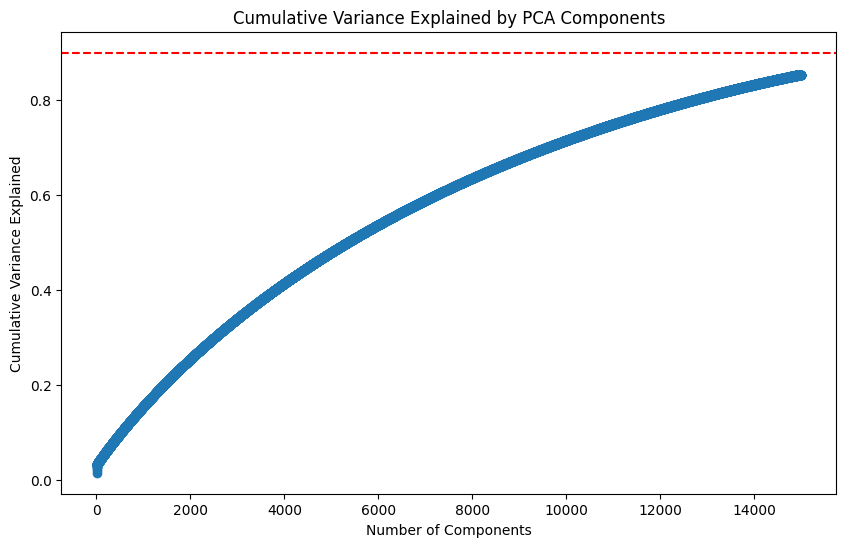

In [14]:
visualize_cum_var(pca_3)

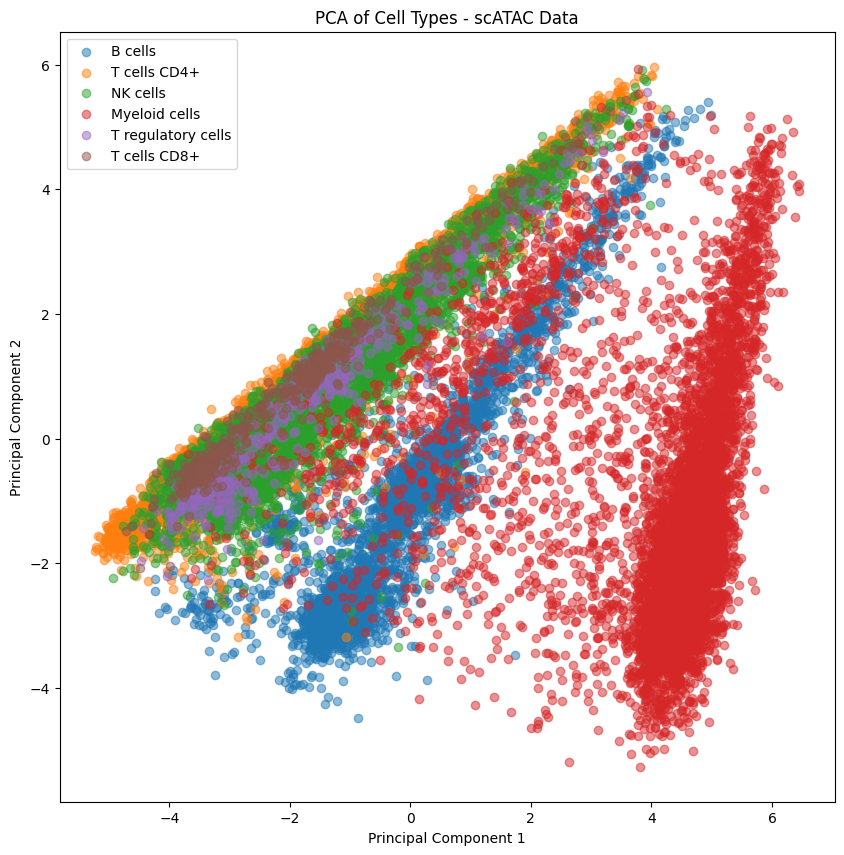

In [15]:
visualize_pca(pca_df_3)

In [19]:
cell_type_embeddings = pca_df_3.groupby('cell_type').mean()
cell_type_embeddings.to_csv("cell_type_embeddings.csv")

In [58]:
svd_df, svd = svd_analysis(atac_data, cell_types, n_components=10000, scale=True)

In [61]:
pickle.dump((svd_df, svd), open("data/svd_10000_components.pkl", "wb+"))

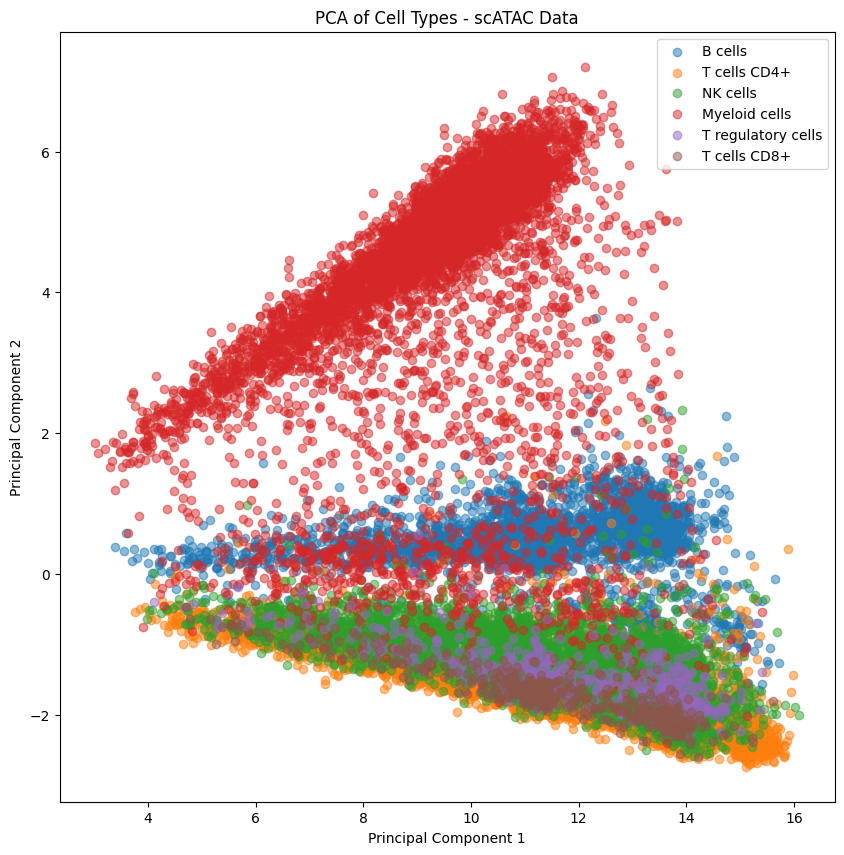

In [59]:
visualize_pca(svd_df)

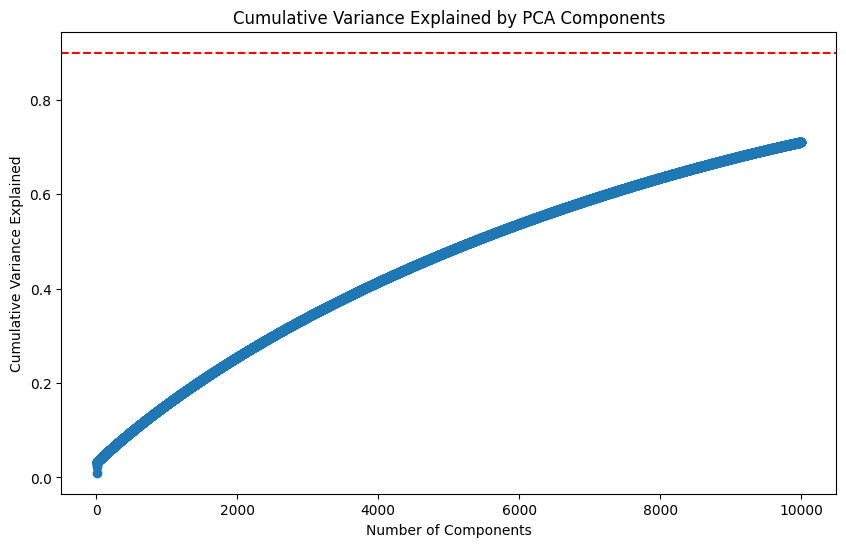

In [62]:
visualize_cum_var(svd)

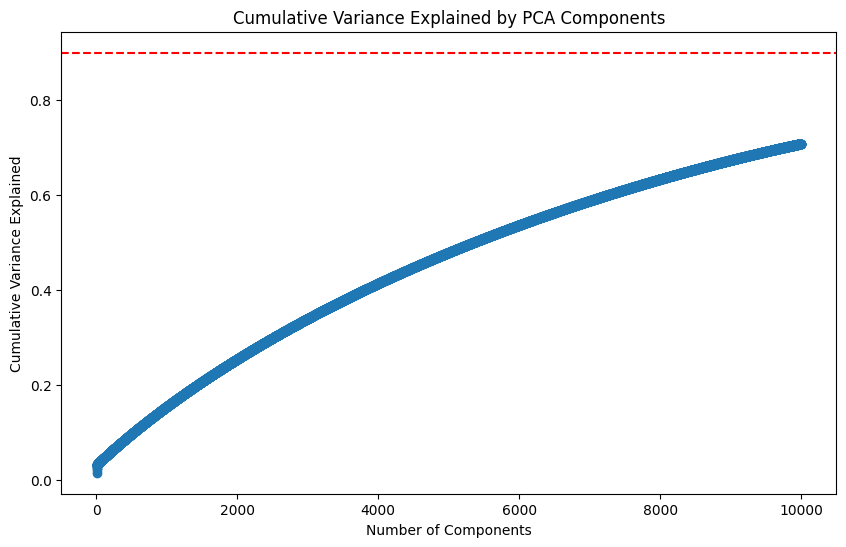

In [56]:
import numpy as np

cumulative_variance = np.cumsum(pca_2.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
plt.show()


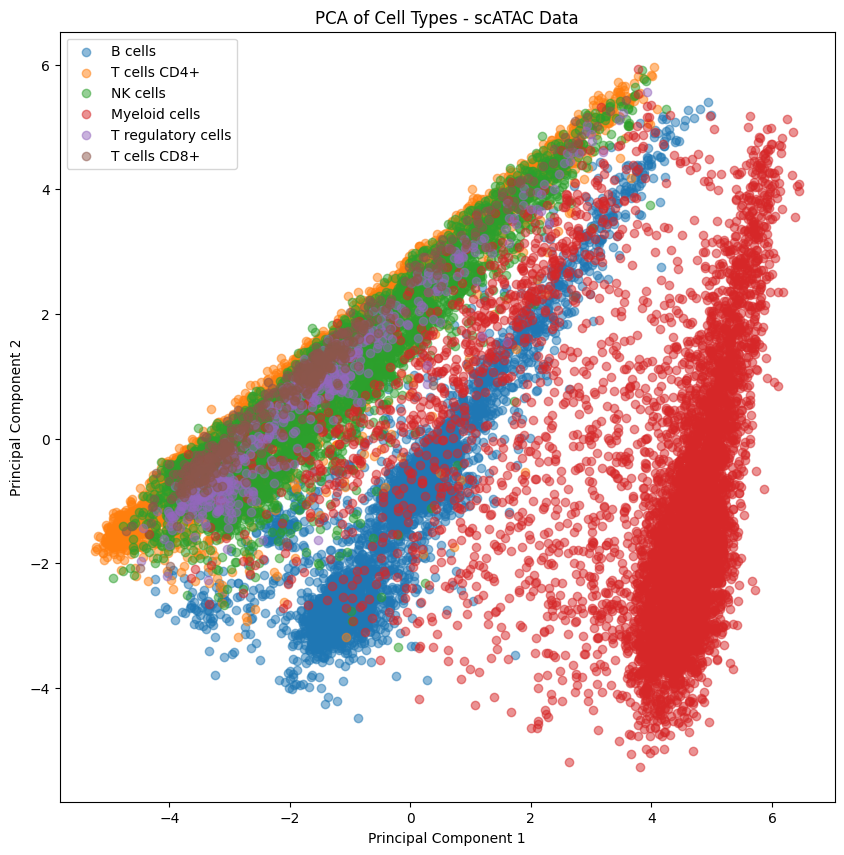

In [55]:
visualize_pca(pca_df_2)

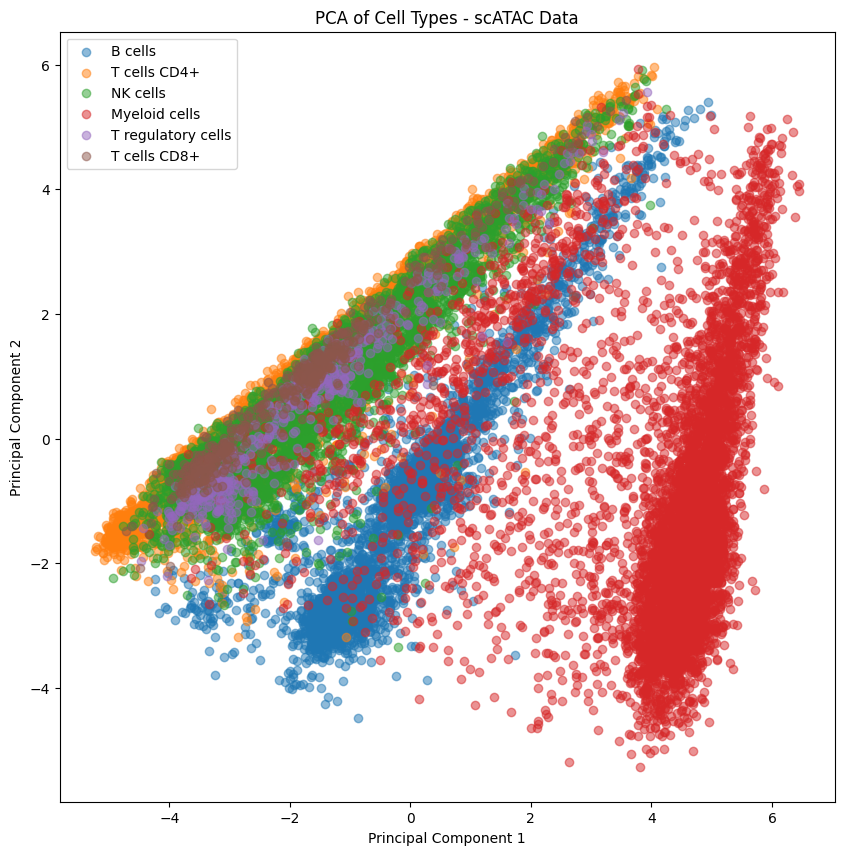

In [51]:
visualize_pca(pca_df)

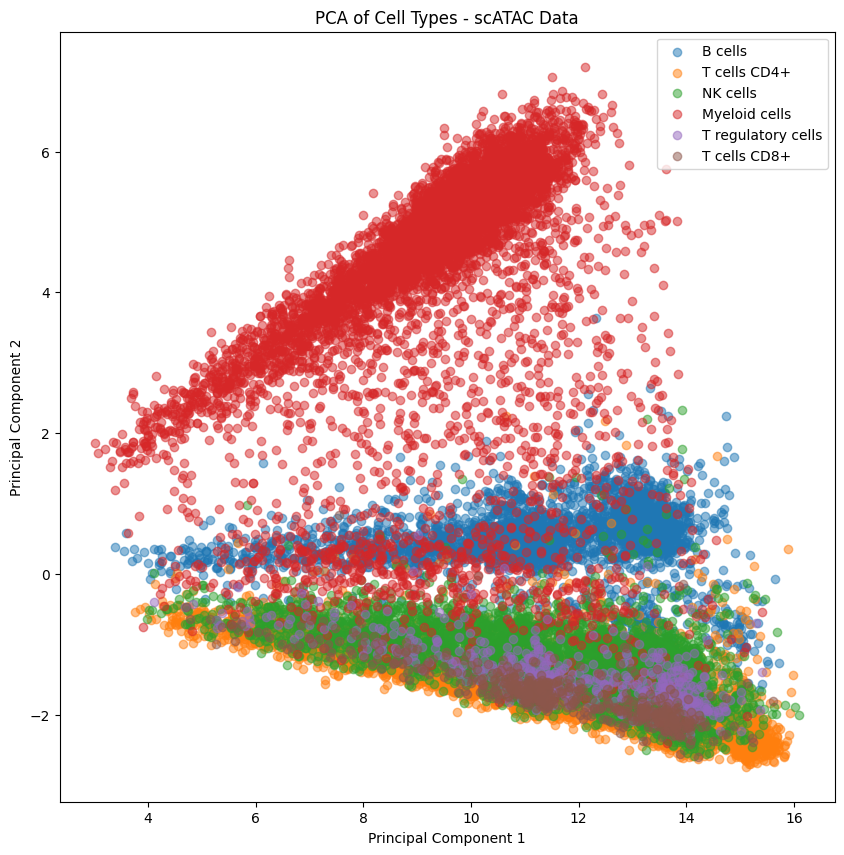

In [20]:
visualize_pca(svd_df)

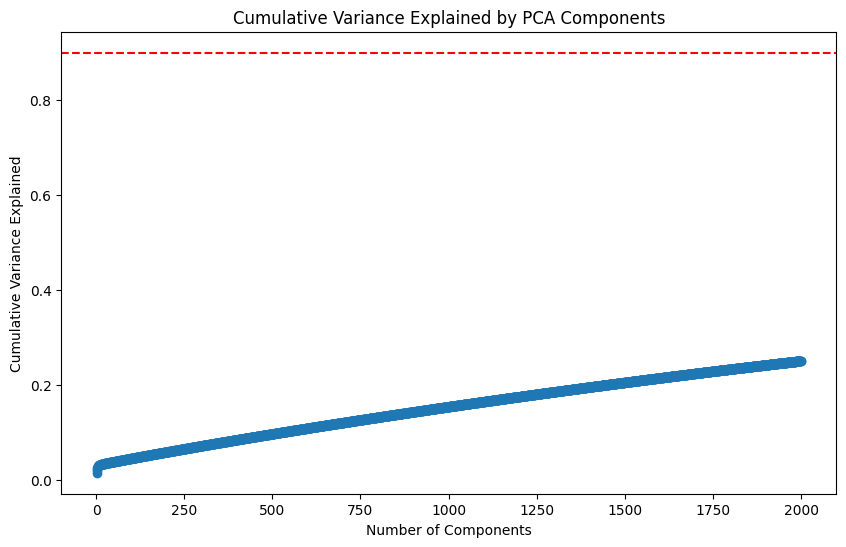

In [52]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
plt.show()


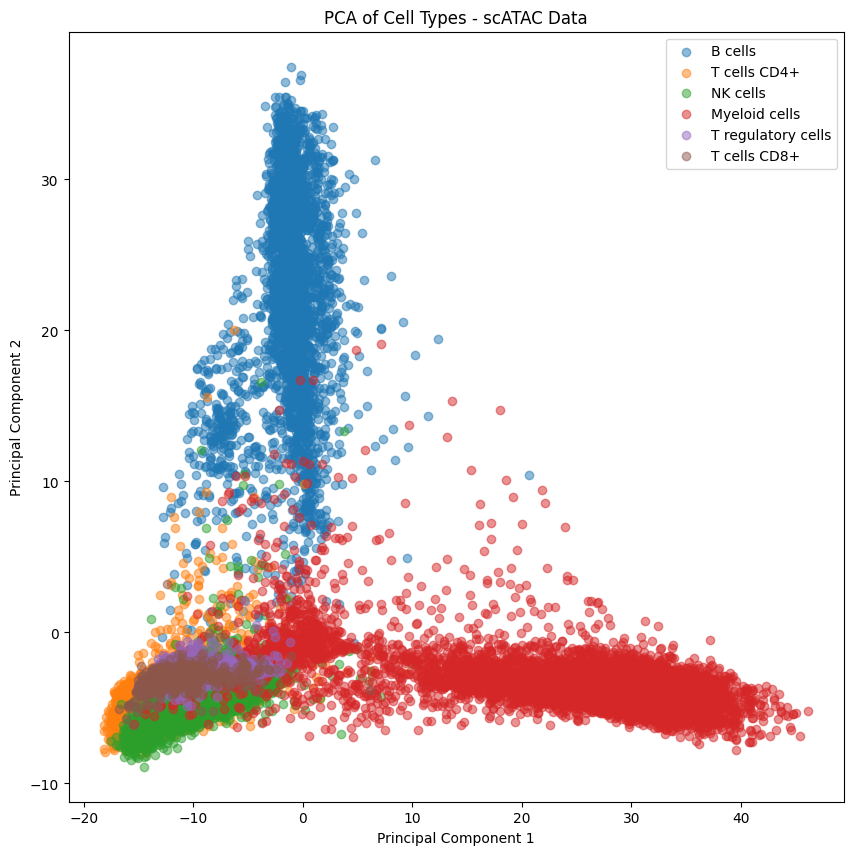

In [10]:
visualize_pca(svd_df)

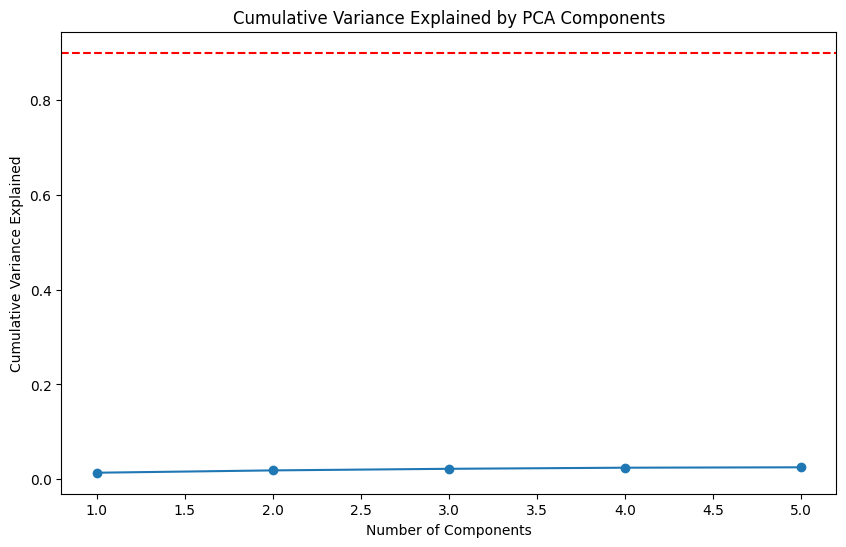

In [11]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
plt.show()


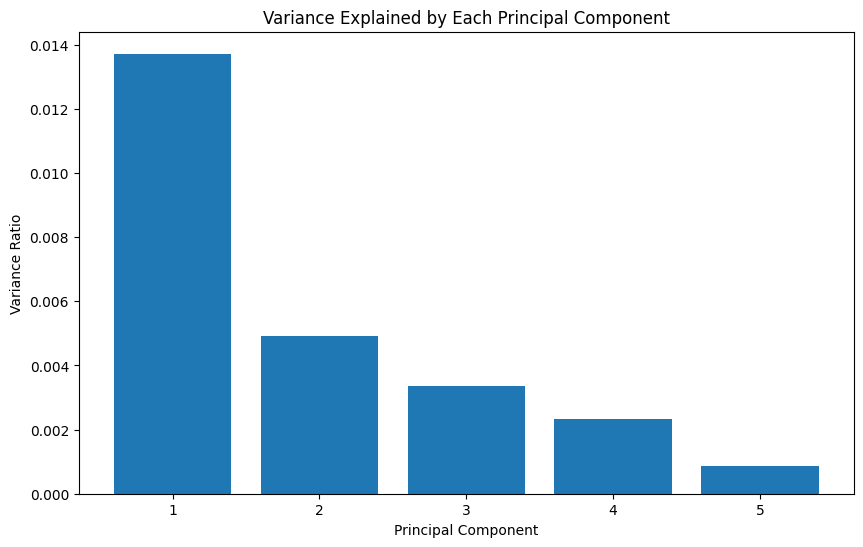

In [12]:
import matplotlib.pyplot as plt

# Assuming pca is your PCA model from sklearn

# Variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Variance Explained by Each Principal Component')
plt.show()

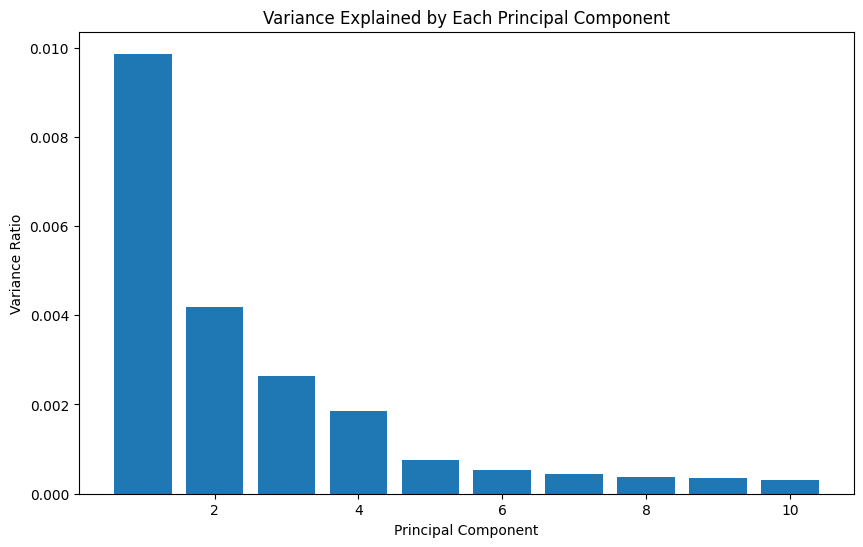

In [44]:
import matplotlib.pyplot as plt

# Assuming pca is your PCA model from sklearn

# Variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Variance Explained by Each Principal Component')
plt.show()

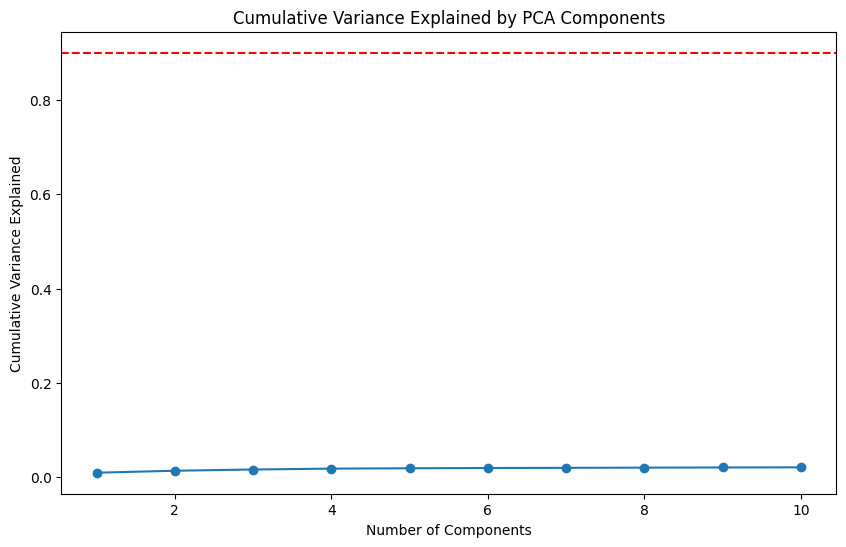

In [39]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% variance
plt.show()
